In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision.datasets.mnist import MNIST
from torch.autograd import Variable
from torch.utils.data import DataLoader

import ae

using devide: cpu


In [2]:
mnist_dataset_train = MNIST('./tmp/', train=True, download=True,
                            transform=ae.preprocess)

In [3]:
train_data = DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)

In [4]:
len(mnist_dataset_train)

60000

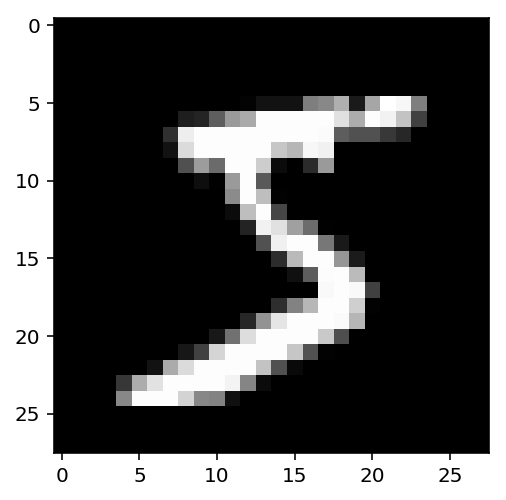

In [5]:
plt.imshow(mnist_dataset_train[0][0].numpy()[0], cmap='gray')

In [6]:
model = ae.train()

epoch: 0 loss: 195.0093231201172
epoch: 1 loss: 160.166015625
epoch: 2 loss: 152.68324279785156
epoch: 3 loss: 148.5390625
epoch: 4 loss: 145.86492919921875
epoch: 5 loss: 143.8184814453125
epoch: 6 loss: 142.50106811523438
epoch: 7 loss: 140.9993133544922
epoch: 8 loss: 139.8123779296875
epoch: 9 loss: 139.2896270751953
epoch: 10 loss: 138.5273895263672
epoch: 11 loss: 137.41876220703125
epoch: 12 loss: 136.60916137695312
epoch: 13 loss: 135.96788024902344
epoch: 14 loss: 135.51412963867188
epoch: 15 loss: 134.99168395996094
epoch: 16 loss: 134.2593536376953
epoch: 17 loss: 133.91307067871094
epoch: 18 loss: 133.35800170898438
epoch: 19 loss: 133.50473022460938


In [6]:
#torch.save(model, 'ae.pth')
model = torch.load('ae.pth') 

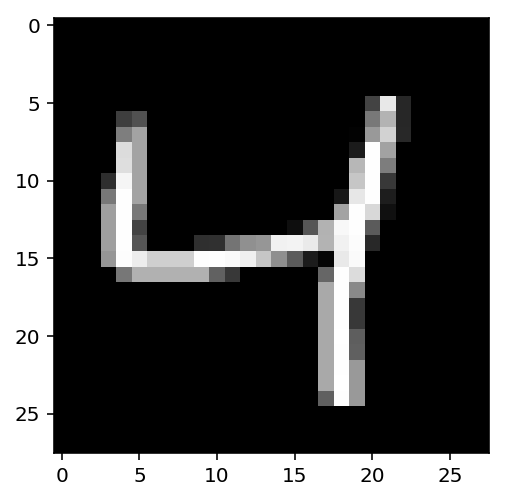

In [7]:
plt.imshow(ae.to_img(mnist_dataset_train[2][0][0]), cmap='gray')

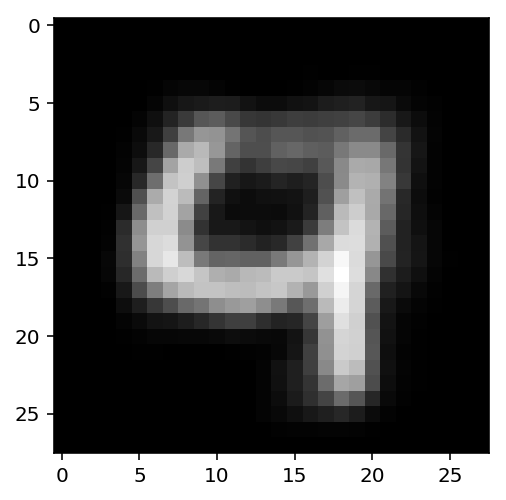

In [8]:
img = model(Variable(mnist_dataset_train[2][0]))
img = img.data
plt.imshow(ae.to_img(img).numpy()[0], cmap='gray')

In [9]:
latents = ae.collect_latents(model)
latents.head(3)

,t,x,y
0,5,-20.622936,-19.193764
1,0,-1.784821,-18.350647
2,4,6.306226,7.429294


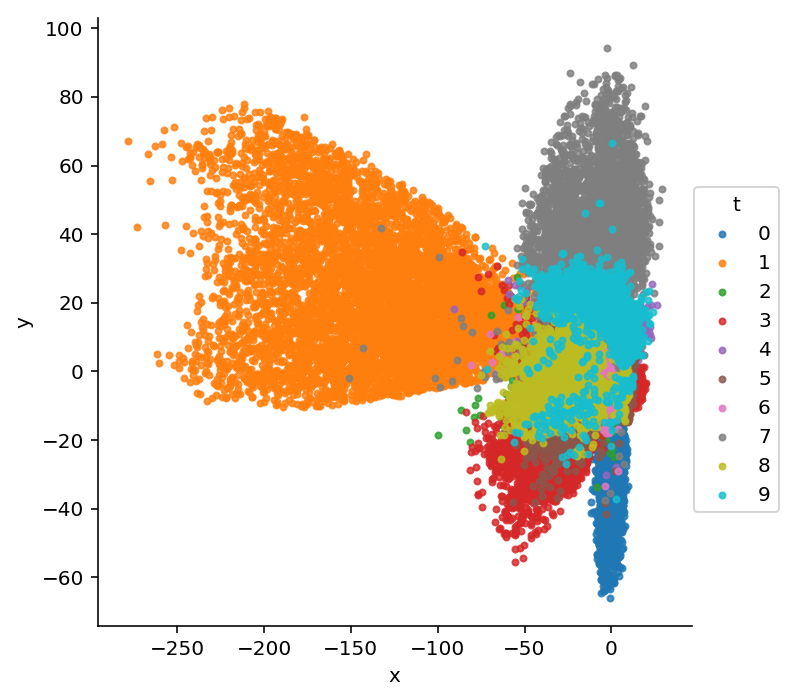

In [10]:
sns.lmplot('x', 'y', latents, hue='t', fit_reg=False, markers='.')

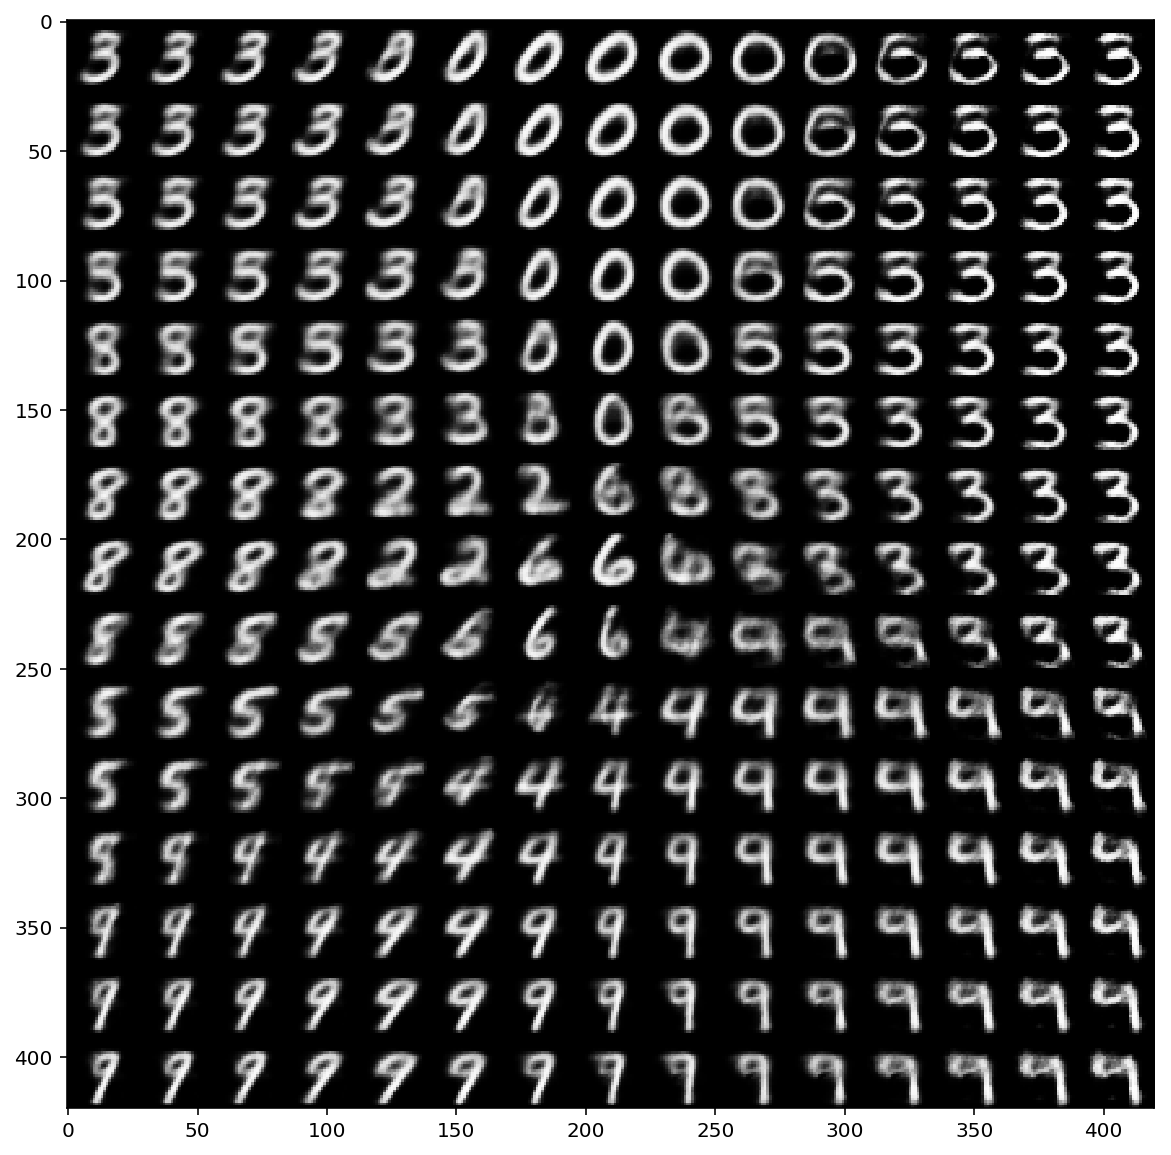

In [11]:
ae.plot_digits(model)